In [46]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
path="/content/drive/MyDrive/python/losangeleslakers.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("/content/drive/MyDrive/python/losangeleslakers.xlsx")
post_df_full1=post_df_full

In [49]:
def parse_reactions(x):
    if pd.isna(x):
        return {}
    else:
        try:
            return eval(x)
        except SyntaxError:
            return {}

post_df_full1['reactions'] = post_df_full1['reactions'].apply(parse_reactions)
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

<ipython-input-49-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-49-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-49-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series)
<ipython-input-49-34d6db4c6bbc>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Tuesday. 7pm. Our place.,3839.0,2453.0,7.0,18.0,NaN,NaN,56.0,135,117,6373
1,Making lifetime memories 💜💛,5182.0,2940.0,10.0,9.0,1.0,1.0,88.0,119,259,8231
2,Full week ahead\n\nCincoro x #LakeShow,2370.0,932.0,4.0,7.0,1.0,1.0,36.0,124,189,3351
3,👑🐍♾️,21165.0,17756.0,41.0,38.0,17.0,4.0,536.0,2100,502,39557
4,The Kid from Akron gave the squad a tour of th...,5334.0,3068.0,14.0,21.0,NaN,1.0,95.0,299,200,8533
...,...,...,...,...,...,...,...,...,...,...,...
110,#LAKERSWIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636,225,17000
111,Continuing a proud tradition of honoring our s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,38,1400
112,F1 meets Lake Show 🏎️🏀\n\n@charles_leclerc x @...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,194,8800
113,"Welcome to our house, legend 🙌\n\nD'Angelo Rus...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,243,130,22000


phân tích bài viết

In [50]:
post_list=post_list.tolist()

In [51]:
print(post_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      print(post['comments_full'])
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full'] ])
      res.append(cmt)
print(len(res))
print(res)

[{'comment_id': '934916558068650', 'comment_url': 'https://facebook.com/934916558068650', 'commenter_id': '655648035', 'commenter_url': 'https://facebook.com/mhavi.pamaran?eav=AfavVSWeKnQXpF6kO_ZNmoEyhQp7MQcP-ThobVsE7rARK7tzZGOn64pn5aBj0Ts4A_Q&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Mavz Pacana', 'commenter_meta': None, 'comment_text': 'Cam Vando Rui should come back if they want to win it all', 'comment_time': datetime.datetime(2023, 11, 28, 21, 0), 'comment_image': 'https://scontent.fmaa10-1.fna.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AfCj8Y5vuUIdKYKk0rhiQLFieg8v2ZVFDBKIq9RHFoG_dg&oe=658E7F79&_nc_sid=7da55a', 'comment_reactors': [{'name': 'Bunch Gyle', 'link': 'https://facebook.com/profile.php?id=100092259761247&eav=AfaHRuBrwp45yI8R2DU1Iv79HGjvSs2RyF1AOY3nGd5pHkq1PpBx2YiWyeuAVv72e7Y&fref=pb&paipv=0', 'type': 'love'}, {'name': 'Jeush Anzures', 'link': 'http

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [53]:
res

["Cam Vando Rui should come back if they want to win it all\nLet’s go Lakers!! Let’s win the in season tournament 🏆👏👏👏\nAin’t worried. We for sure only play great during tournament games. Regular season not so much.\nThe first trophy guys please let put it in our trophy collection 🙏🏼\nProtect the homecourt and win the 🏆\nLet's go lakers\nPlease We need healthy Vando, Reddish, Gab and RUI and its over\nPlay-in tournament next in 2024 👍👍👍\nEL MEJOR DE RODOS LOS TIEMPOS VAMOS SIGAMOS ROMPIENDO RÉCORDS 💜💛💜\nLet's Go Lakers! 💜💛\nLet's get it!\nWe do need our defensive guys back, especially Reddish and AD in beast mode, we definitely take the game.\nGoing to be a tough game.\nLavine\nDoes this game count towards our record\nlakers beat phoenix sun in quarterfinals\nLet's go Lakers\nLet's go lads\nSheesh mahina kalaban ng Lakers ko surewin sana lagi jazz piston Memphis Blazers kalaban 🔥\nHow many plays to tAke the second round 1 or 3 games advantage?\nGanda nito Kung maglaro na SI vando at ca

keyword thống kê trong thời gian gần đây

In [54]:
text=""
for i in res:
  text=text+i+" . "
text

'Cam Vando Rui should come back if they want to win it all\nLet’s go Lakers!! Let’s win the in season tournament 🏆👏👏👏\nAin’t worried. We for sure only play great during tournament games. Regular season not so much.\nThe first trophy guys please let put it in our trophy collection 🙏🏼\nProtect the homecourt and win the 🏆\nLet\'s go lakers\nPlease We need healthy Vando, Reddish, Gab and RUI and its over\nPlay-in tournament next in 2024 👍👍👍\nEL MEJOR DE RODOS LOS TIEMPOS VAMOS SIGAMOS ROMPIENDO RÉCORDS 💜💛💜\nLet\'s Go Lakers! 💜💛\nLet\'s get it!\nWe do need our defensive guys back, especially Reddish and AD in beast mode, we definitely take the game.\nGoing to be a tough game.\nLavine\nDoes this game count towards our record\nlakers beat phoenix sun in quarterfinals\nLet\'s go Lakers\nLet\'s go lads\nSheesh mahina kalaban ng Lakers ko surewin sana lagi jazz piston Memphis Blazers kalaban 🔥\nHow many plays to tAke the second round 1 or 3 games advantage?\nGanda nito Kung maglaro na SI vando a

In [55]:
text_fix=text
print(len(text))
text

138156


'Cam Vando Rui should come back if they want to win it all\nLet’s go Lakers!! Let’s win the in season tournament 🏆👏👏👏\nAin’t worried. We for sure only play great during tournament games. Regular season not so much.\nThe first trophy guys please let put it in our trophy collection 🙏🏼\nProtect the homecourt and win the 🏆\nLet\'s go lakers\nPlease We need healthy Vando, Reddish, Gab and RUI and its over\nPlay-in tournament next in 2024 👍👍👍\nEL MEJOR DE RODOS LOS TIEMPOS VAMOS SIGAMOS ROMPIENDO RÉCORDS 💜💛💜\nLet\'s Go Lakers! 💜💛\nLet\'s get it!\nWe do need our defensive guys back, especially Reddish and AD in beast mode, we definitely take the game.\nGoing to be a tough game.\nLavine\nDoes this game count towards our record\nlakers beat phoenix sun in quarterfinals\nLet\'s go Lakers\nLet\'s go lads\nSheesh mahina kalaban ng Lakers ko surewin sana lagi jazz piston Memphis Blazers kalaban 🔥\nHow many plays to tAke the second round 1 or 3 games advantage?\nGanda nito Kung maglaro na SI vando a

In [56]:
!pip install -U nltk
!pip install rake-nltk

In [57]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.8.1.


In [58]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize
import math
from operator import itemgetter

In [60]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(text)
# r.get_ranked_phrases()
res_cach1=r.get_ranked_phrases_with_scores()
print(res_cach1)

[(1050.9147435897435, 'nasty 🤮 ❤️❤️ evi raten damian murphy reggie young paulie vegas dang nagallo reyes sylvia perry young draco fanomezana olivia chris young draco jayda dennis large earns chris mendoza kendrick aaron joshua dias geraldo rivera new apparel'), (935.8363720249484, 'last 8 go lakers 💪🔥 galingan niu mga pri 💪💜💛 mautak din kayong dalawa sabi nyo pitikan ko kayo tapos pitikan nyo din kami ni jerome j mangulabnan sabay takbo kayo sa locker room may'), (576.7300532800532, '￼ h29milly_offish al michael angelo donque armando diaz kc belizeard costy constantin tony borg yannick energy energy kristopher scott jett bg delbert lynn ammons jy busel new apparel'), (523.5311355311355, 'michael mark spencer roronoa tsukimata nanci mora bdruø deep edovssy digodot dominic pelayo michael david keijoh ita ryan aaron alex kenneth sekarin jessica new apparel'), (422.13314340831585, '❤️💜💛 congratulations 💜💛💜💛💜💛 💜💜💛💛💪 🏀💜💛 💜🤍🖤💛 🏀🏀🏀 ❤️ 👏 ang aga \U0001f979🤍 💛💜❤️ lovelots 🏀🏀🏀❤️❤️ 💜🤍🖤💛 💜💛 💜 💜💛💜💛 

In [61]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique

stop_words=[i[1] for i in res_cach1]
stop_words.reverse()
stop_words=get_unique_numbers(stop_words)
# stop_words=set(stop_words)
print(stop_words)

['!!!!!!!!!!!!!!', '!!!??', '!,', '!?', '!❤❤❤👏', '!💪🏻', '!🙏🏾👑🐐💜💛💜💛💜💛💜💛', '%*', '.🏀🏀', '.😤🐐👑', '00', '00am', '03', '06', '11', '156046390839382', '16', '19', '2018', '258387107091763', '29', '300', '3p', '41', '43', '6471194256237434', '76er', '7blocks', '7x', '995', 'aaaaaaaaaah', 'abandoning', 'able', 'acceptable', 'accepted', 'accommodating', 'accomplishments', 'active', 'adidas', 'admin', 'admire', 'ah', 'allien', 'allowed', 'alpha', 'amaze', 'americ', 'america', 'angle', 'antics', 'anxious', 'appearance', 'apply', 'approved', 'argue', 'arguments', 'arrived', 'ashamed', 'asked', 'asking', 'attributed', 'audience', 'audited', 'authority', 'autograph', 'awful', 'ayayay', 'bailing', 'balance', 'banner', 'barely', 'bashed', 'basically', 'batman', 'battling', 'becoming', 'bed', 'beginning', 'behalf', 'behavior', 'believing', 'belittle', 'benefit', 'bigger', 'blamed', 'blind', 'block', 'blowing', 'blunt', 'bonus', 'boost', 'booze', 'boston', 'bound', 'box', 'br', 'braid', 'brain', 'breaks

In [62]:
for i in stop_words:
  text = text.replace(i,"");

In [63]:
# tìm số từ xuất hiện trong tài liệu
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#tìm số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len)

20270
1510


In [64]:
# Tính TF cho mỗi từ
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Cam': 29, 'Vado': 13, 'Ri': 14, 'sod': 41, 'me': 61, 'i': 611, 't': 303, 'to': 501, 'it': 290, 'a': 737, 'Lets': 58, 'o': 1094, 'Lakes': 285, 'te': 964, 'tot': 21, '🏆👏👏👏': 1, 'Ait': 1, '': 564, 'We': 51, 'oy': 47, 'di': 15, 'Re': 1, 'so': 83, 'Te': 138, 'ist': 29, 's': 477, 'ease': 11, 'etio': 1, '🏼': 2, 'Pet': 1, '🏆': 11, "Let's": 77, 'Pease': 4, 'Vado,': 2, 'Redd,': 3, 'Gab': 2, 'RUI': 1, 'its': 19, 'ove': 24, 'Pay-i': 1, '👍👍👍': 3, 'EL': 1, 'MEJOR': 1, 'DE': 1, 'RODOS': 1, 'LOS': 1, 'TIEMPOS': 1, 'VAMOS': 1, 'SIGAMOS': 1, 'ROMPIENDO': 1, 'RÉCORDS': 1, '💜': 12, 'Go': 64, 'Lakes!': 20, 'it!': 4, 'do': 69, 'deeve': 7, ',': 207, 'ey': 12, 'Redd': 10, 'AD': 108, 'mode,': 1, 'e': 605, 'Goi': 8, 'be': 182, 'Lavie': 6, 'Does': 3, 'tis': 195, 'tods': 4, 'ed': 91, 'oei': 1, 'teias': 1, 'Sees': 1, 'mia': 3, 'kaa': 3, 'ko': 6, 'saa': 5, 'ai': 21, 'isto': 1, 'Mis': 6, 'Bazes': 4, 'Ho': 15, 'y': 124, 'tAke': 1, 'vat?': 1, 'Gada': 1, 'ito': 10, 'K': 3, 'mao': 4, 'SI': 4, 'at': 170, 'Babatay': 1, 

In [65]:
def check_sent(word, sentences):
    final = [all([w in x for w in word]) for x in sentences]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)

{'Cam': 2.4220251298580586, 'Vado': 3.3686212112275427, 'Ri': 2.1103787769675493, 'sod': 0.7759530842441777, 'me': 0.9707259384291722, 'i': 0.32593195458578056, 't': 0.2322912242509969, 'to': 0.36331948665740094, 'it': 0.4041414811776561, 'a': 0.27670501382062995, 'Lets': 1.1295495239558229, 'o': 0.2654152716760294, 'Lakes': 1.5057343979839035, 'te': 0.29967422149704476, 'tot': 0.36331948665740094, '🏆👏👏👏': 7.31986492980897, 'Ait': 7.31986492980897, '': 0.0, 'We': 2.0265601050844775, 'oy': 1.0451029085670311, 'di': 0.7489819674693856, 'Re': 7.31986492980897, 'so': 0.38158044579201006, 'Te': 1.4199675762264785, 'ist': 0.48253211512337885, 's': 0.24405606583058315, 'ease': 0.4262085752063346, 'etio': 7.31986492980897, '🏼': 4.9219696570105995, 'Pet': 7.31986492980897, '🏆': 4.141811099461024, "Let's": 2.232268594576586, 'Pease': 2.694892116524699, 'Vado,': 4.1843707138798205, 'Redd,': 3.145477659913333, 'Gab': 2.3853909966782783, 'RUI': 7.31986492980897, 'its': 0.48253211512337885, 'ove': 1

In [66]:
# Lấy N từ quan trọng nhất của comments
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{'Lakes': 0.021170907914425878,
 'I': 0.01862531824088403,
 ',': 0.01510602947183835,
 'o': 0.01432483015360514,
 'te': 0.014251896868433703,
 'be': 0.010849943830081159,
 'LeBo': 0.010731966062493737,
 'AD': 0.010510991568913771,
 'a': 0.010060759505959757,
 'yo': 0.010054024034068626}

hình ảnh

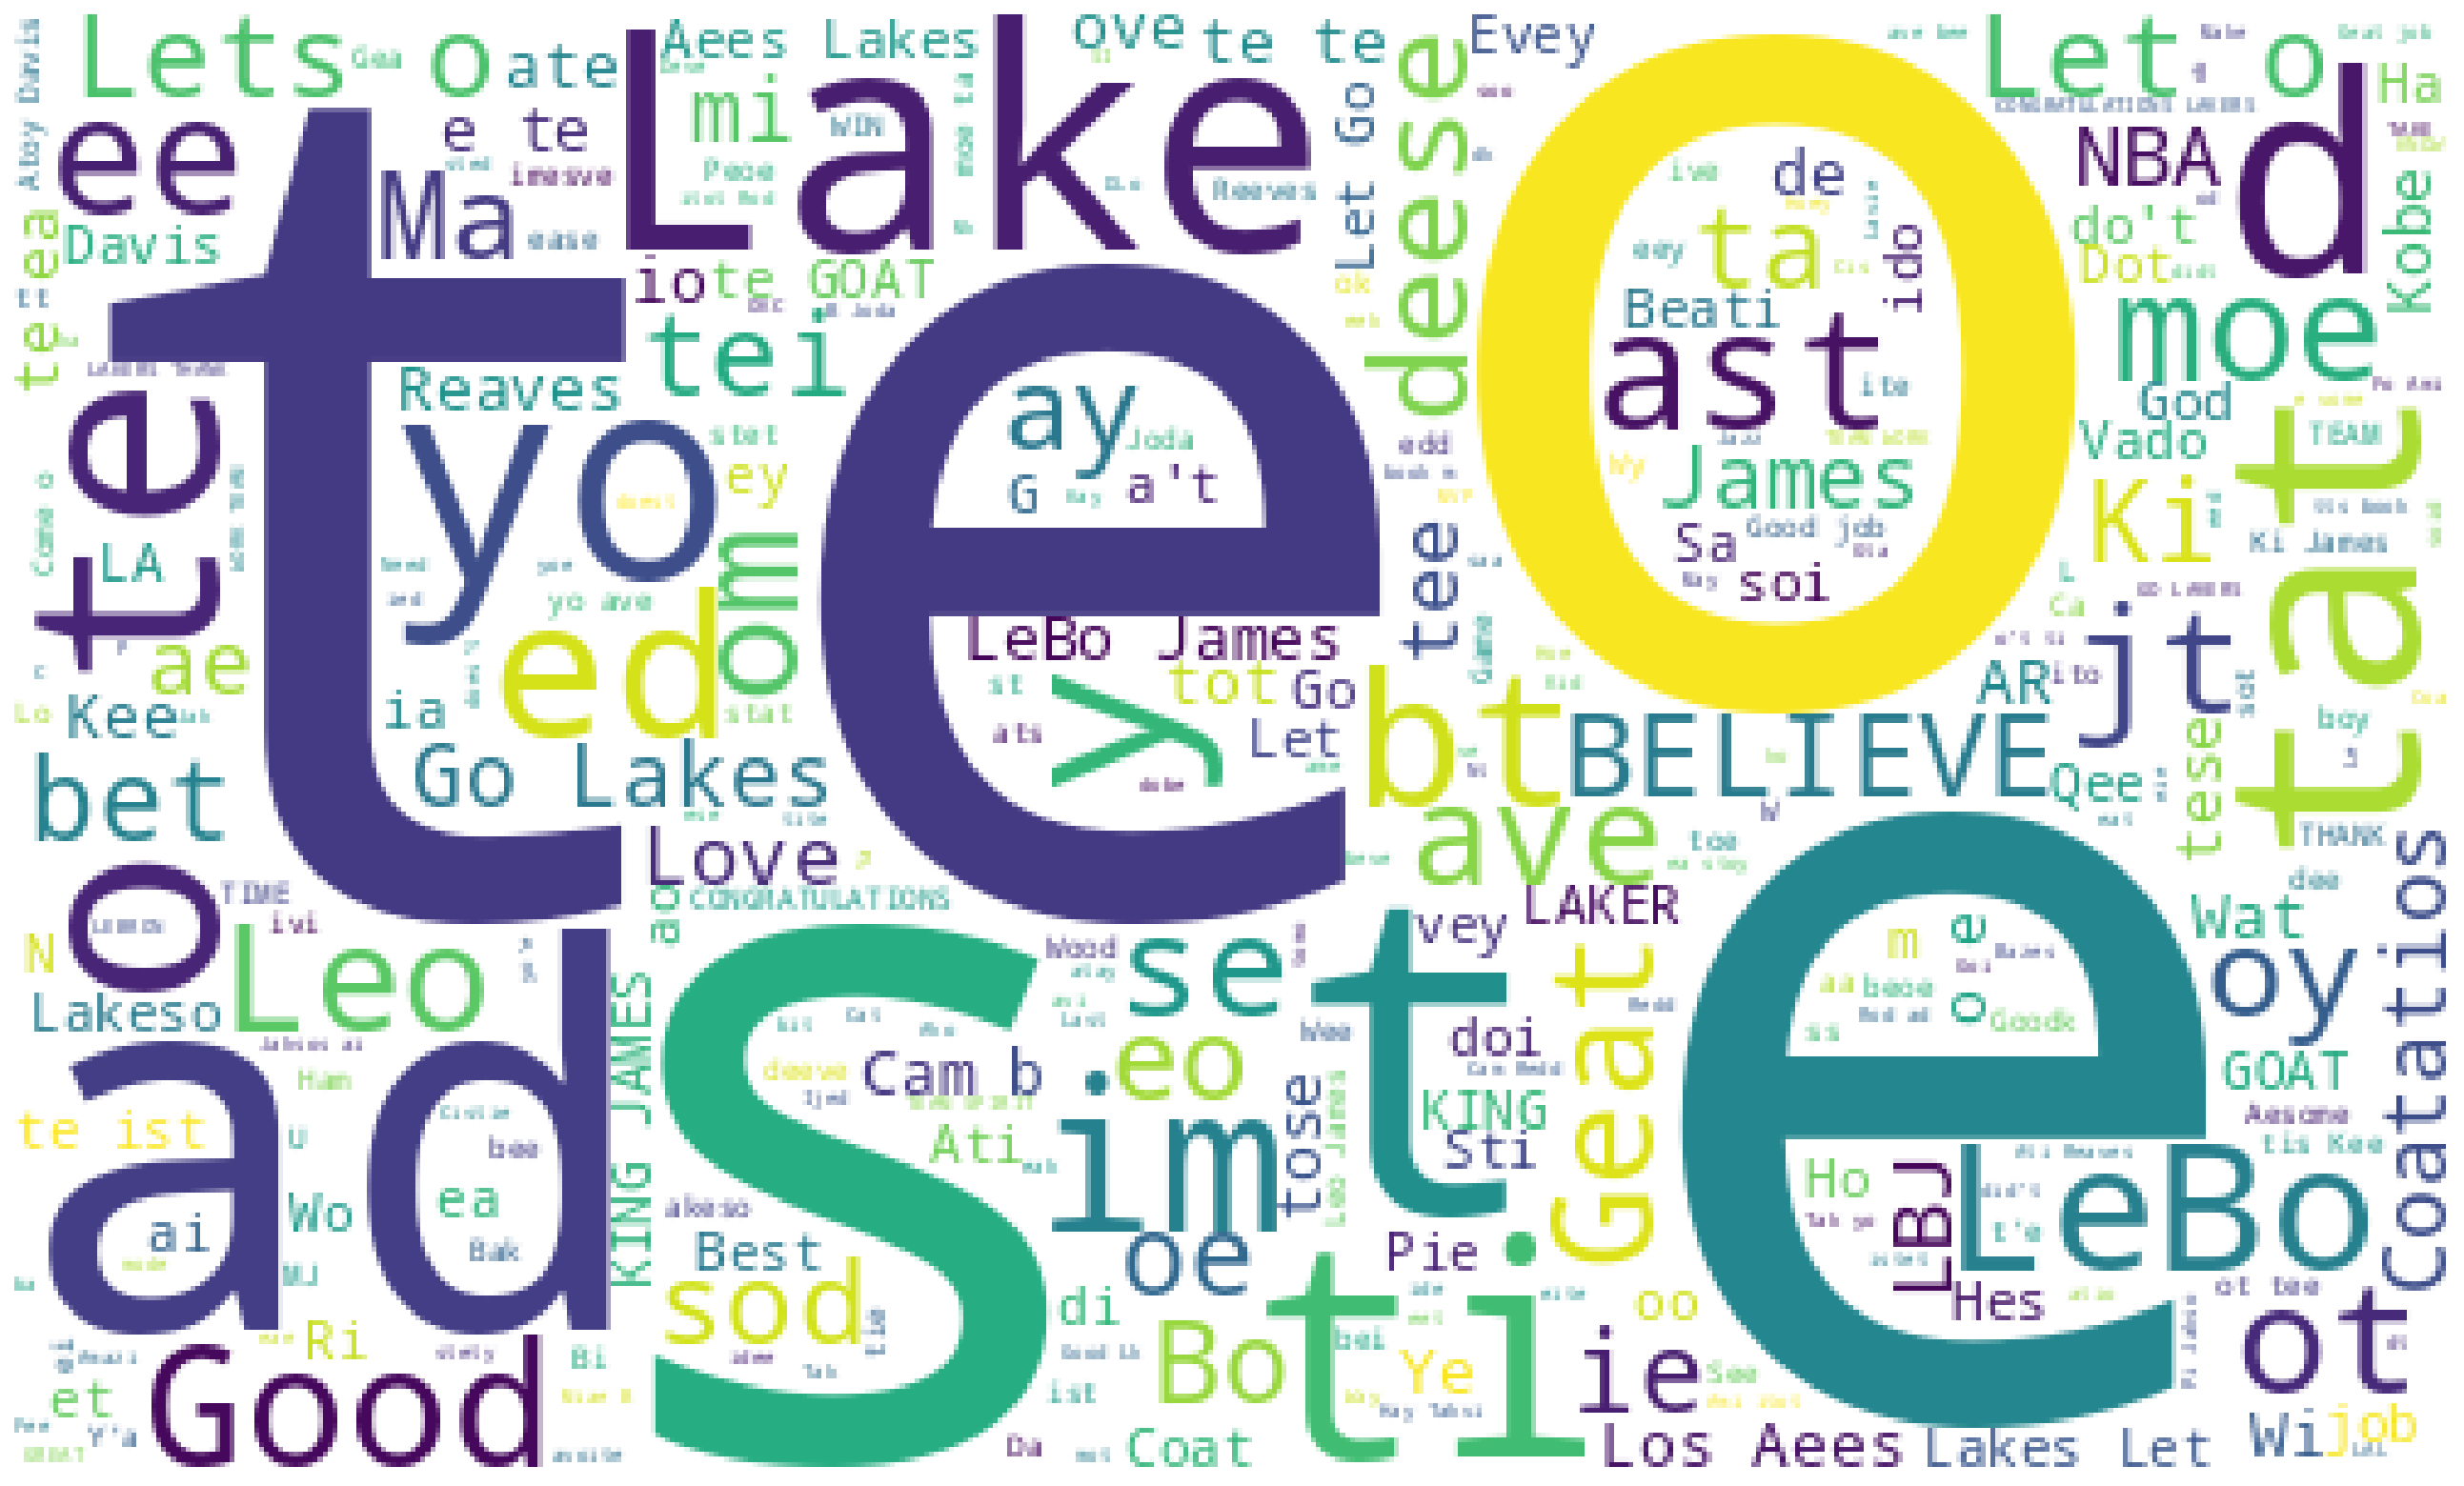

In [67]:
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

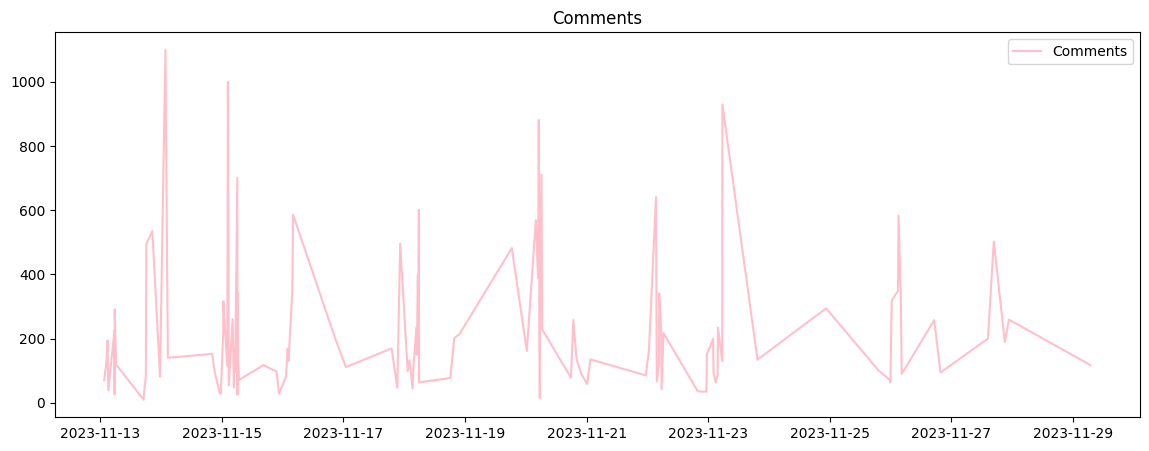

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], color='pink', label='Comments')
ax.set_title("Comments")
ax.legend()
plt.show()

In [69]:
max_reaction_post = post_df_full.loc[post_df_full['comments'].idxmax()]
max_reaction_post

post_id                                                            890311932457653
text                                                                  Fresh look 👀
post_text                                                             Fresh look 👀
shared_text                                                                    NaN
original_text                                                                  NaN
time                                                           2023-11-14 01:42:25
timestamp                                                               1699926145
image                            https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....
image_lowquality                 https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....
images                           ['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...
images_description               ['May be an image of basketball and text', 'Ma...
images_lowquality                ['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...
imag

In [70]:
max_reaction_post = post_df_full.loc[post_df_full['reaction_count'].idxmin()]
max_reaction_post

post_id                                                            889896869165826
text                             Defense wins tacos 🌮🌮\n\n#WeGotTacos | Jack in...
post_text                        Defense wins tacos 🌮🌮\n\n#WeGotTacos | Jack in...
shared_text                                                                    NaN
original_text                                                                  NaN
time                                                           2023-11-13 05:37:16
timestamp                                                               1699853836
image                            https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....
image_lowquality                 https://scontent.fmaa10-1.fna.fbcdn.net/v/t39....
images                           ['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...
images_description               ['May be an image of burrito and text that say...
images_lowquality                ['https://scontent.fmaa10-1.fna.fbcdn.net/v/t3...
imag

tạo 1 dataframe mới để chứa các comments

In [78]:
import re
import datetime
import json
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result


In [79]:
def createCommentsFrame(df):
    df_result = {"comment_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "comment_reactions" : [],
                   "post_id" : [],"commenter_id" :[],
                   "commenter_name" : []}

    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['comment_reactions'].append(comment['comment_reactions'])
                df_result['post_id'].append(rows.post_id)
                df_result['commenter_id'].append(comment['commenter_id'])
                df_result['commenter_name'].append(comment['commenter_name'])
            except:
                continue
    return pd.DataFrame(df_result)

In [80]:
df_comment = createCommentsFrame(post_df_full)
df_comment

,comment_id,comment_text,comment_time,comment_reactions,post_id,commenter_id,commenter_name
0,315459547997465,Anas Hashmi https://t.me/\n+ZWRanpd0VFxhYmI\n8,2023-11-28 20:00:00,None,897936568361856,100094449649132,Gladys Monroy
1,313993941517910,Kendall Kai Tomas be real,2023-11-28 21:00:00,None,897936568361856,100000542801881,Frank Saldana
2,314033114857563,"Kendall Kai Tomas Same here ain't worried, the...",2023-11-28 23:22:00,None,897936568361856,61554037981020,Drew Owen
3,896934481994358,Play-in tournament next in 2024 👍👍👍,2023-11-28 23:42:00,None,897936568361856,100000099117808,Christian Sonio
4,733693694762323,EL MEJOR DE RODOS LOS TIEMPOS VAMOS SIGAMOS RO...,2023-11-28 23:43:00,None,897936568361856,100007769102488,Geofrey Martens Campos
...,...,...,...,...,...,...,...
1282,2024239817976031,And it sounds like he’s been a great teammate....,2023-11-15 00:00:00,None,890256209129892,1473112885,Steve Loo
1283,238696595664219,🏀🏀🏀,2023-11-15 00:00:00,None,890155595806620,100000922938891,Eugene David Harris
1284,358017833310297,Alexandra Martinez too much together 🤩,2023-11-15 00:00:00,None,890155595806620,760346519,Rosie James-Rodríguez
1285,3233106076993453,I KNOW WE DON'T KNOW EACH OTHER BUT TO EVERYON...,2023-11-15 00:00:00,None,890155595806620,100095803980638,Queen daauus


from matplotlib import pyplot as plt
df_comment['post_id'].plot(kind='hist', bins=20, title='post_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['comment_time']
  ys = series['post_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_comment.sort_values('comment_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('comment_time')
_ = plt.ylabel('post_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['comment_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'comment_time'}, axis=1)
              .sort_values('comment_time', ascending=True))
  xs = counted['comment_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_comment.sort_values('comment_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('comment_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['comment_time']
  ys = series['post_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_comment.sort_values('comment_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('comment_time')
_ = plt.ylabel('post_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['comment_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'comment_time'}, axis=1)
              .sort_values('comment_time', ascending=True))
  xs = counted['comment_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_comment.sort_values('comment_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('comment_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_comment['post_id'].plot(kind='line', figsize=(8, 4), title='post_id')
plt.gca().spines[['top', 'right']].set_visible(False)

Người dùng có lượt comments nhiều nhất

In [83]:
commenter_counts = pd.Series(df_comment['commenter_name']).value_counts()
max_commenter_name = commenter_counts.index[0]
max_commenter_frequency = commenter_counts.iloc[0]
id_most = df_comment[df_comment['commenter_name'] == max_commenter_name]['commenter_id'].iloc[0]
print("Commenter with the highest number of comments:")
print("Name:", max_commenter_name)
print("Frequency:", max_commenter_frequency)
print("ID:", id_most)

Commenter with the highest number of comments:
Name: Brian Hatfield
Frequency: 21
ID: 100027337009286
